# Predicting Patient No-Shows Using Machine Learning

In [67]:
#Importing necessary libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('patient_no_show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Overview

In [69]:
df.shape

(110527, 14)

In [70]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [71]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [72]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [73]:
df.duplicated().sum()

0

## Data Cleaning

In [74]:
df['Neighbourhood'].nunique()

81

In [75]:
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [76]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.normalize()
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.normalize()
df.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [77]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Exploratory Data Analysis

<AxesSubplot:>

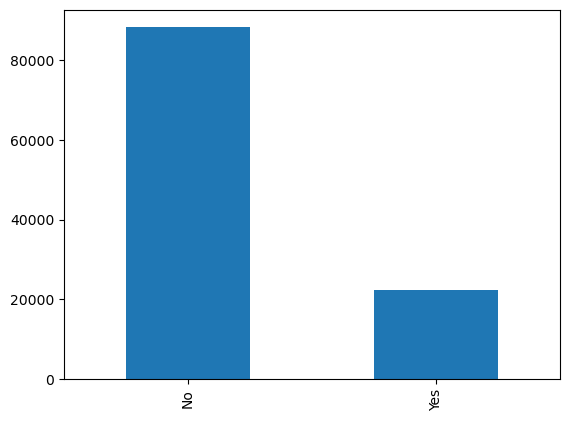

In [78]:
df['No-show'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

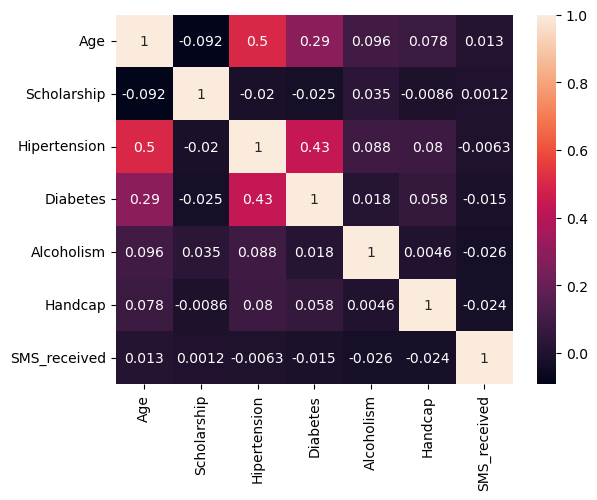

In [79]:
sns.heatmap(df.corr(), annot= True)

In [80]:
df['gap'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,gap
0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [81]:
df['gap'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

## 🧹 Handling Invalid Lead Times

Some records had negative lead times (like -1 or -6), which doesn't make sense—appointments can't be booked after their scheduled date. So, we removed those rows to keep the data clean and make sure the model isn't learning from incorrect information.


In [82]:
df = df[df['gap']>= 0]
df['gap'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  80,
        86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,  90,
       151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122, 101,
       105,  92,  97,  93, 107,  95, 139, 132, 179, 117, 146, 123],
      dtype=int64)

### No-Show % vs Gap Between Scheduled and Appointment Day

In [83]:
gap_total = df.groupby('gap').size()
gap_noshow = df[df['No-show'] == 'Yes'].groupby('gap').size()

gap_percent = round((gap_noshow / gap_total) * 100, 2)

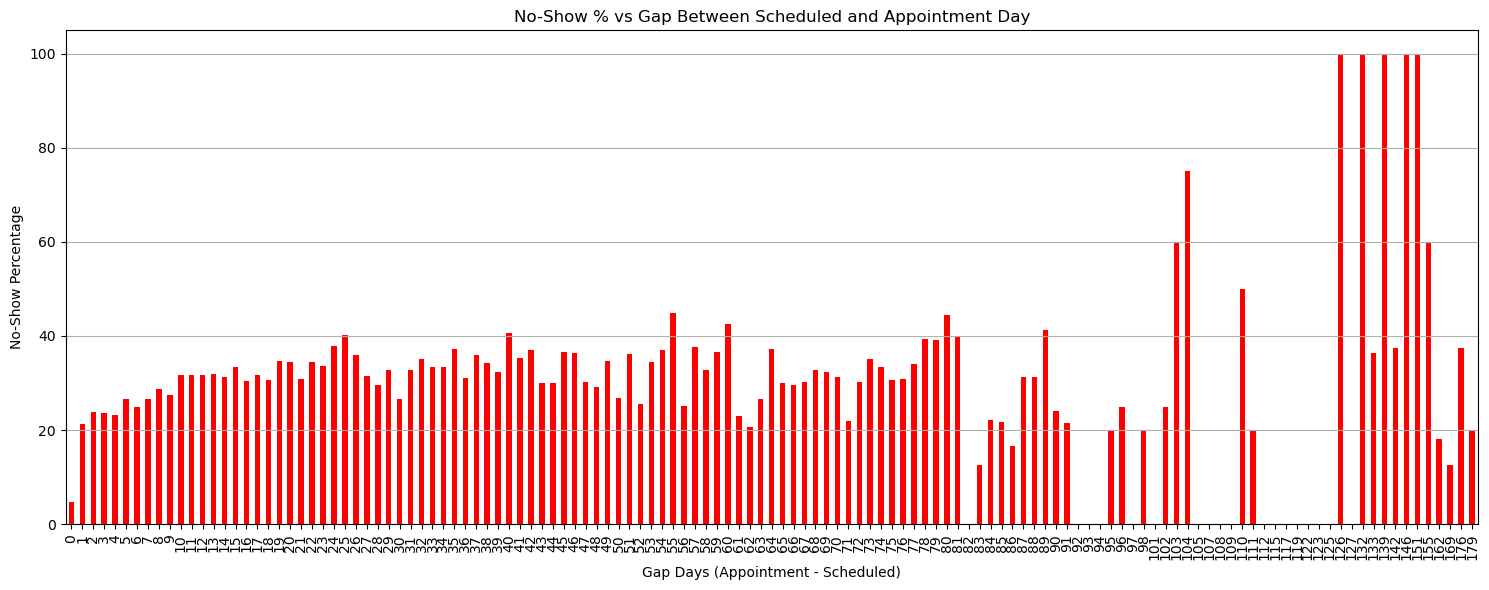

In [84]:
plt.figure(figsize=(15,6))
gap_percent.plot(kind='bar', color='red')
plt.xlabel('Gap Days (Appointment - Scheduled)')
plt.ylabel('No-Show Percentage')
plt.title('No-Show % vs Gap Between Scheduled and Appointment Day')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [85]:
sms_total = df.groupby('SMS_received').size()
sms_noshow = df[df['No-show'] == 'Yes'].groupby('SMS_received').size()
sms_percent = round((sms_noshow / sms_total) * 100, 2)

### % of No-Shows Based on SMS Received

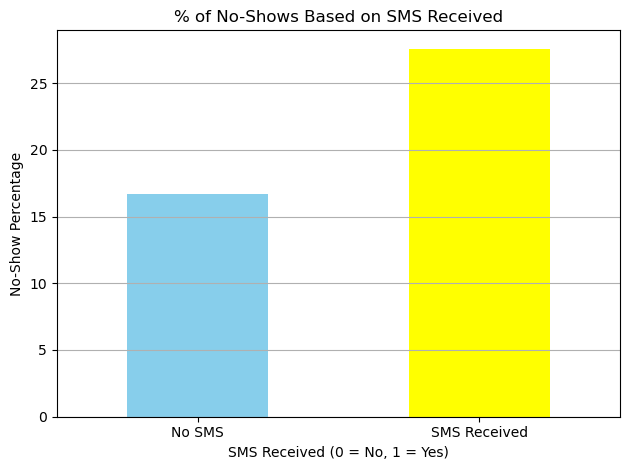

In [86]:
sms_percent.plot(kind='bar', color=['skyblue', 'yellow'])
plt.title('% of No-Shows Based on SMS Received')
plt.xlabel('SMS Received (0 = No, 1 = Yes)')
plt.ylabel('No-Show Percentage')
plt.xticks([0, 1], ['No SMS', 'SMS Received'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [87]:
neighbourhood_total = df.groupby('Neighbourhood').size()
neighbourhood_noshow = df[df['No-show'] == 'Yes'].groupby('Neighbourhood').size()
neighbourhood_percent = round((neighbourhood_noshow / neighbourhood_total) * 100, 2)

### % of No-Show Base On Location

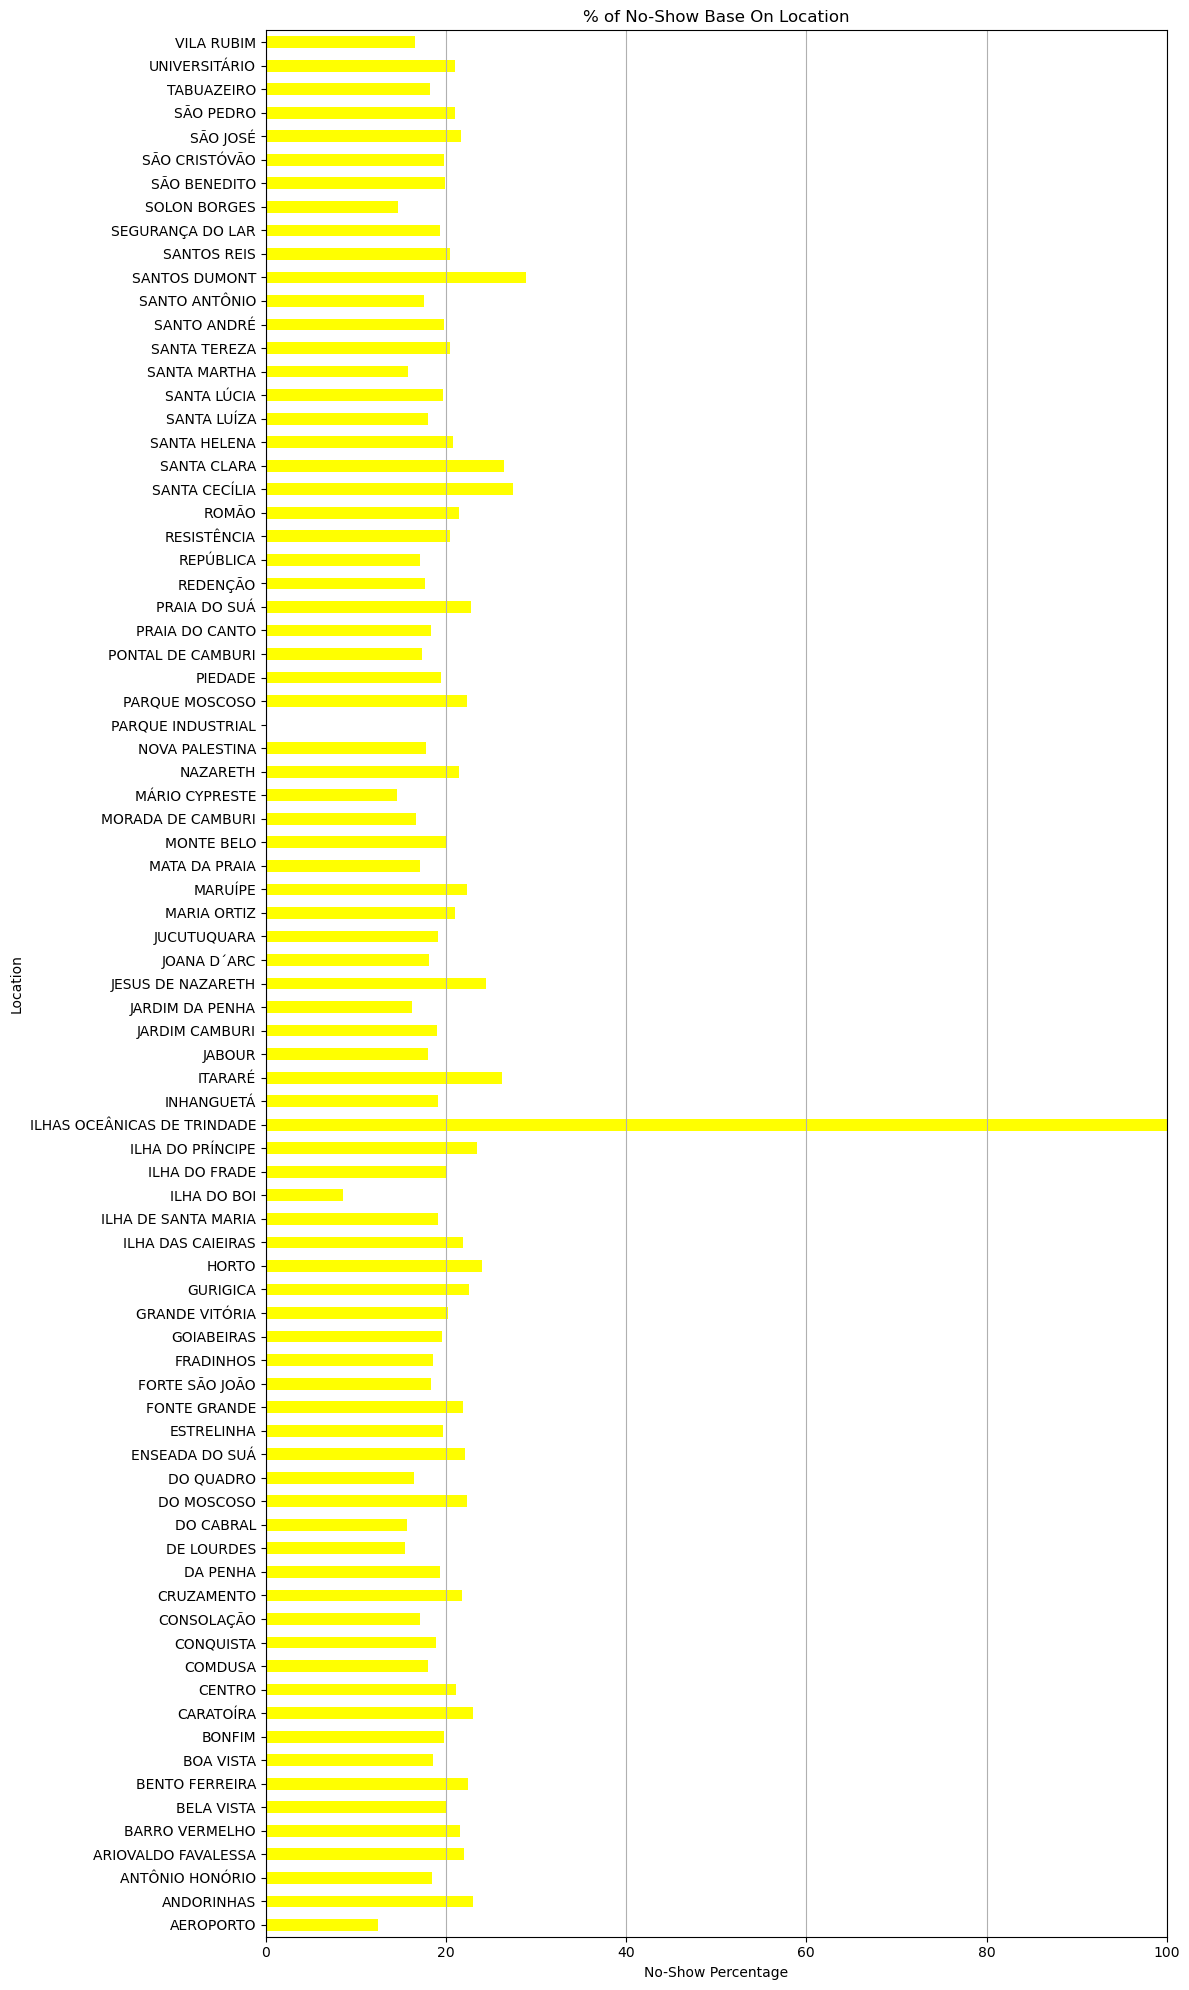

In [88]:
plt.figure(figsize=(12,20))
neighbourhood_percent.plot(kind='barh', color= 'yellow')
plt.title('% of No-Show Base On Location')
plt.xlabel('No-Show Percentage')
plt.ylabel('Location')
plt.xlim(0, 100)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [89]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [90]:
df[df['Neighbourhood'] == 'ILHAS OCEÂNICAS DE TRINDADE']

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,gap
48754,F,2016-04-14 00:00:00+00:00,2016-05-13 00:00:00+00:00,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,Yes,29
48765,F,2016-04-14 00:00:00+00:00,2016-05-13 00:00:00+00:00,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,Yes,29


In [91]:
df = df[df['Neighbourhood'] != 'ILHAS OCEÂNICAS DE TRINDADE' ]

### Removing Outlier Neighbourhood

There was one neighbourhood — `ILHAS OCEÂNICAS DE TRINDADE` — that had a 100% no-show rate, but it only appeared twice in the entire dataset. Since this extremely small sample can bias the model during training and doesn't represent general behavior, it was removed to maintain data quality.


#### Creating the Age Group

In [92]:
bins = [0, 25, 50, 75, 100, 120]
labels = ['0-25', '26-50', '51-75', '76-100', '100+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

### % of No-Show by Age Group

In [93]:
age_total = df.groupby('age_group').size()
age_noshow = df[df['No-show'] == 'Yes'].groupby('age_group').size()
age_noshow_percent = (age_noshow / age_total) * 100

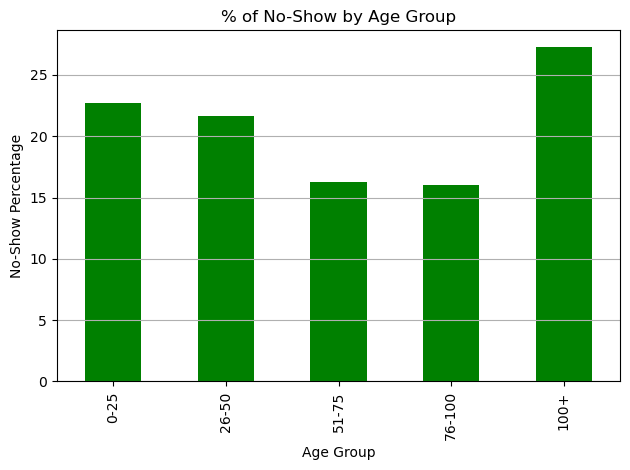

In [94]:
age_noshow_percent.plot(kind='bar', color='green')
plt.title('% of No-Show by Age Group')
plt.xlabel('Age Group')
plt.ylabel('No-Show Percentage')
#plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [95]:
gender_total = df.groupby('Gender').size()
gender_noshow = df[df['No-show'] == 'Yes'].groupby('Gender').size()
gender_percent = round((gender_noshow / gender_total) * 100, 2)

### % of No-Show Base On Gender

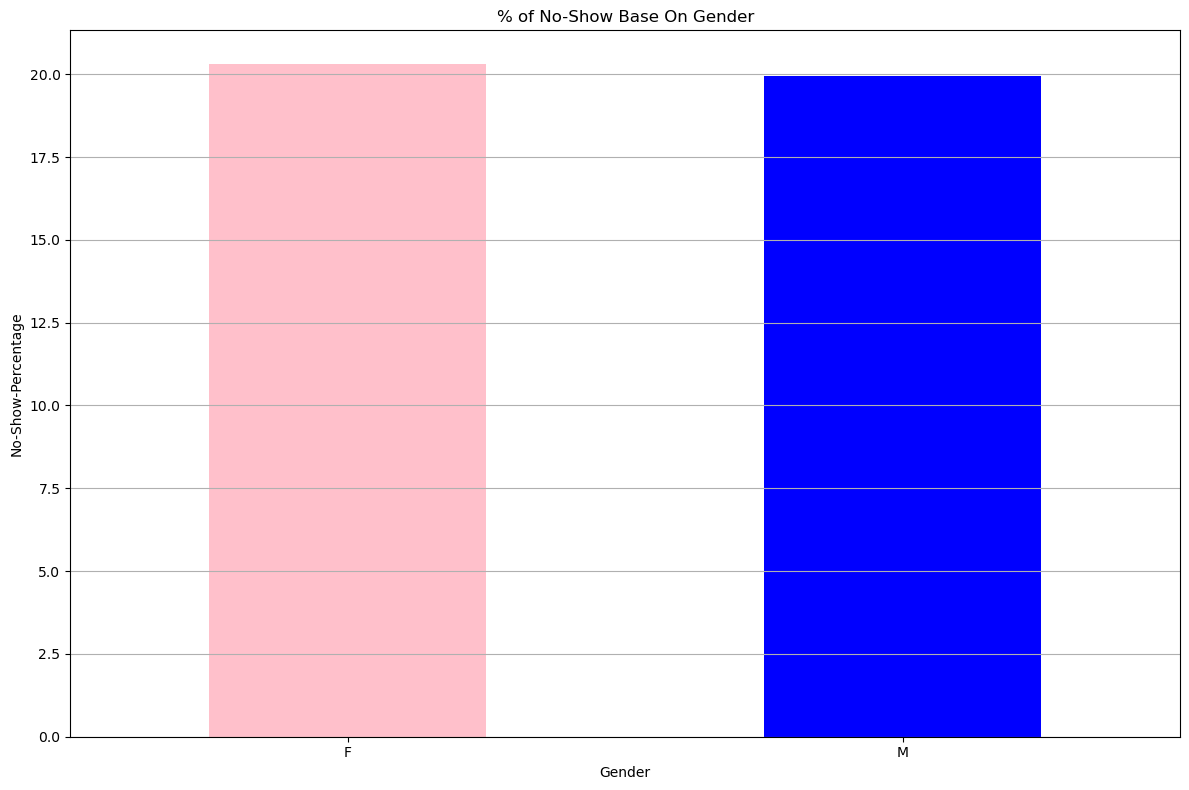

In [96]:
plt.figure(figsize=(12,8))
gender_percent.plot(kind='bar', color= ['pink', 'blue'])
plt.title('% of No-Show Base On Gender')
plt.xlabel('Gender')
plt.ylabel('No-Show-Percentage')
#plt.ylim(0, 100)
plt.xticks(rotation = 0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [97]:
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers


outliers_age = detect_outliers('gap')
print(f"Outliers in Gap: {len(outliers_age)}")

Outliers in Gap: 5803


In [98]:
df['gap_log'] = np.log1p(df['gap'])
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,gap,age_group,gap_log
0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,51-75,0.0
1,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,51-75,0.0
2,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,51-75,0.0
3,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0-25,0.0
4,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,51-75,0.0


### Handling Outliers in Appointment Gap

To detect outliers in the `gap` column (i.e., the number of days between the scheduled date and the appointment date), I used an outlier detection method and found **5,803** outliers. Instead of removing them, I applied a `log1p` transformation to compress the extreme values while preserving the data. This helps the model learn better without being heavily influenced by unusually large gaps.


### Preprocessing The Data For Machine Learning

In [99]:
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,gap,age_group,gap_log
0,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,51-75,0.0
1,1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,51-75,0.0
2,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,51-75,0.0
3,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,0-25,0.0
4,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,51-75,0.0


In [100]:
df['No-show'].unique()

array([0, 1], dtype=int64)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X = df[['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'gap_log']]
y= df['No-show']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42, test_size= 0.3)

In [104]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

77364 77364
33156 33156


### Encoding the 'Neighbourhood' Column

Instead of dropping the `Neighbourhood` column, I used **mean encoding**, where each neighborhood was replaced by its average no-show rate. This keeps the predictive value of the feature without inflating dimensionality.

⚠️ **Note on Data Leakage:**  
To prevent data leakage, the mean encoding was applied **after splitting the dataset into training and testing sets**. This ensures that the model does not learn from the test set during training, which would give an unrealistically high performance estimate.


In [105]:
train_temp = X_train.copy()
train_temp['No-show'] = y_train


train_temp

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,gap_log,No-show
45101,1,26,SANTO ANTÔNIO,0,0,0,0,0,1,2.397895,0
28857,1,56,SANTO ANDRÉ,0,0,0,0,0,1,2.639057,0
71099,1,1,PIEDADE,0,0,0,0,0,0,0.000000,1
2761,1,19,SANTO ANDRÉ,0,0,0,0,0,0,0.000000,0
29114,0,65,SANTA TEREZA,0,1,0,0,0,1,2.079442,0
...,...,...,...,...,...,...,...,...,...,...,...
51564,0,42,PIEDADE,1,0,0,0,0,0,0.000000,0
60602,0,62,PRAIA DO CANTO,0,0,0,0,0,0,0.000000,0
79011,0,8,FRADINHOS,0,0,0,0,0,0,2.639057,0
42178,0,23,JABOUR,0,0,0,0,0,0,3.433987,1


In [106]:
neighborhood_mean = train_temp.groupby('Neighbourhood')['No-show'].mean()

X_train['Neighbourhood_enc'] = X_train['Neighbourhood'].map(neighborhood_mean)
X_test['Neighbourhood_enc'] = X_test['Neighbourhood'].map(neighborhood_mean)

X_train = X_train.drop(columns=['Neighbourhood'])
X_test = X_test.drop(columns=['Neighbourhood'])

X_train

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,gap_log,Neighbourhood_enc
45101,1,26,0,0,0,0,0,1,2.397895,0.173913
28857,1,56,0,0,0,0,0,1,2.639057,0.203352
71099,1,1,0,0,0,0,0,0,0.000000,0.228395
2761,1,19,0,0,0,0,0,0,0.000000,0.203352
29114,0,65,0,1,0,0,0,1,2.079442,0.201690
...,...,...,...,...,...,...,...,...,...,...
51564,0,42,1,0,0,0,0,0,0.000000,0.228395
60602,0,62,0,0,0,0,0,0,0.000000,0.181435
79011,0,8,0,0,0,0,0,0,2.639057,0.182292
42178,0,23,0,0,0,0,0,0,3.433987,0.175806


### Handling Class Imbalance

I noticed a significant class imbalance — around 80% of patients showed up for their appointment, while only 20% did not. To address this, I used the **SMOTE (Synthetic Minority Over-sampling Technique)** method to oversample the minority class and balance the dataset. This helps the model learn patterns from both classes more effectively.

In [107]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [108]:
X_train_sm

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,gap_log,Neighbourhood_enc
0,1,26,0,0,0,0,0,1,2.397895,0.173913
1,1,56,0,0,0,0,0,1,2.639057,0.203352
2,1,1,0,0,0,0,0,0,0.000000,0.228395
3,1,19,0,0,0,0,0,0,0.000000,0.203352
4,0,65,0,1,0,0,0,1,2.079442,0.201690
...,...,...,...,...,...,...,...,...,...,...
123487,0,23,0,0,0,0,0,1,3.091042,0.206148
123488,0,13,0,0,0,0,0,1,1.609438,0.265954
123489,0,58,0,0,0,0,0,0,0.000000,0.189945
123490,0,31,0,0,0,0,0,1,3.337866,0.201393


### Standardizing `X_train` and `X_test`

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sm_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

### Creating A Function To Run Different Models

In [111]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test):
    models = {'Random Forest': RandomForestClassifier(random_state=42),
              'Logistic Regression': LogisticRegression(random_state=42, max_iter = 1000),
              'XGBoost' : XGBClassifier(random_state = 42, eval_metric = 'logloss') }


    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        
        accuracy = accuracy_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)
        
        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"AUC Score: {auc_score:.2f}")
        print(f"Classification Report: \n{cr}")
        
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Show', 'Show'], yticklabels=['No Show', 'Show'])
        plt.title(f"Confusion Matrix for {model_name}")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        


Model: Random Forest
Accuracy: 0.73
AUC Score: 0.70
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.81      0.82     26462
           1       0.34      0.39      0.37      6694

    accuracy                           0.73     33156
   macro avg       0.59      0.60      0.59     33156
weighted avg       0.74      0.73      0.73     33156



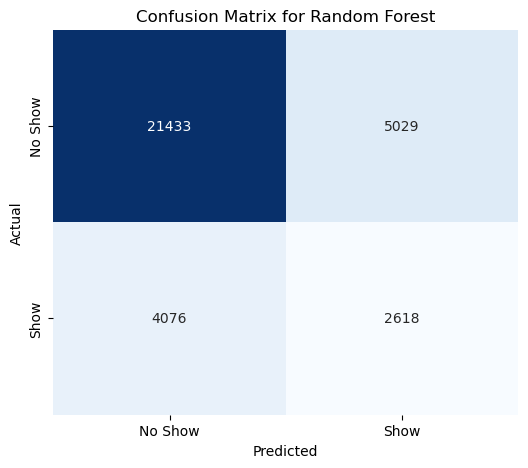

Model: Logistic Regression
Accuracy: 0.65
AUC Score: 0.71
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.65      0.75     26462
           1       0.32      0.66      0.43      6694

    accuracy                           0.65     33156
   macro avg       0.60      0.65      0.59     33156
weighted avg       0.77      0.65      0.68     33156



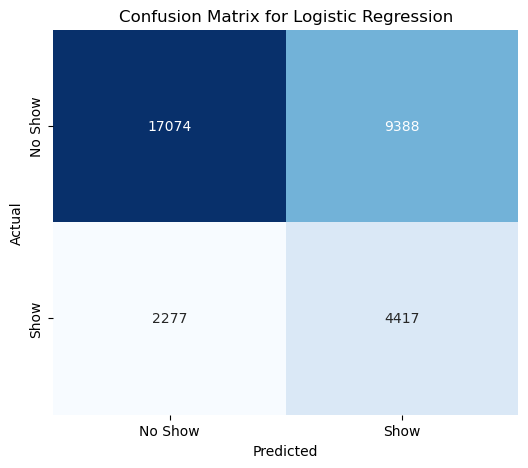

Model: XGBoost
Accuracy: 0.76
AUC Score: 0.72
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     26462
           1       0.37      0.26      0.31      6694

    accuracy                           0.76     33156
   macro avg       0.60      0.57      0.58     33156
weighted avg       0.73      0.76      0.75     33156



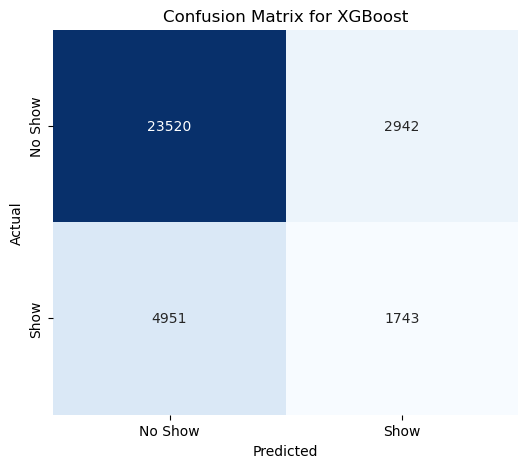

In [112]:
train_and_evaluate_models(X_train_sm_scaled, y_train_sm, X_test_scaled, y_test)

#### Since XGBoost was performing the best (76% accuracy), I decided to hypertune it using `GridSearchCV` for better performance.

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)


grid_search.fit(X_train_sm_scaled, y_train_sm)


best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(X_test_scaled)
y_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [14:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.762335625527808
AUC Score: 0.7207719060791876
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86     26462
           1       0.38      0.28      0.32      6694

    accuracy                           0.76     33156
   macro avg       0.60      0.58      0.59     33156
weighted avg       0.74      0.76      0.75     33156

Confusion Matrix:
 [[23434  3028]
 [ 4852  1842]]


### Since even after hyperparameter tuning the model is biased toward the majority class with ~76% accuracy, let's try downsampling the dataset to balance the classes and improve recall for the minority class.

In [115]:
df_yes = df[df['No-show'] == 1]
df_no = df[df['No-show'] == 0]
df_no_ds = df_no.sample(n=len(df_yes), random_state=42)
df_bal = pd.concat([df_yes, df_no_ds])
df_bal = df_bal.sample(frac=1, random_state=42).reset_index(drop=True)
print(df_bal['No-show'].value_counts(normalize=True))
print(df_bal.shape)
df_bal.head()

0    0.5
1    0.5
Name: No-show, dtype: float64
(44624, 15)


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,gap,age_group,gap_log
0,1,2016-05-18 00:00:00+00:00,2016-05-25 00:00:00+00:00,9,MONTE BELO,0,0,0,0,0,1,0,7,0-25,2.079442
1,0,2016-05-20 00:00:00+00:00,2016-05-25 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,0,1,0,5,26-50,1.791759
2,0,2016-05-30 00:00:00+00:00,2016-06-07 00:00:00+00:00,29,REDENÇÃO,0,0,0,0,0,1,0,8,26-50,2.197225
3,1,2016-04-27 00:00:00+00:00,2016-05-04 00:00:00+00:00,10,RESISTÊNCIA,0,0,0,0,0,1,1,7,0-25,2.079442
4,0,2016-04-25 00:00:00+00:00,2016-05-30 00:00:00+00:00,50,REDENÇÃO,0,0,0,0,0,1,1,35,51-75,3.583519


In [116]:
X = df_bal[['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'gap_log']]
y= df_bal['No-show']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size= 0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(31236, 10) (31236,)
(13388, 10) (13388,)


In [118]:
train_temp = X_train.copy()
train_temp['No-show'] = y_train
train_temp

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,gap_log,No-show
11045,1,14,JARDIM CAMBURI,0,0,0,0,0,0,0.000000,0
34973,1,31,CARATOÍRA,1,0,0,0,0,0,3.135494,1
29479,1,1,RESISTÊNCIA,0,0,0,0,0,0,0.000000,0
20994,0,51,JARDIM CAMBURI,0,0,0,0,0,0,1.386294,0
11598,1,56,SÃO BENEDITO,0,1,0,1,0,0,1.098612,1
...,...,...,...,...,...,...,...,...,...,...,...
6265,1,48,JUCUTUQUARA,0,0,0,0,0,1,3.784190,1
11284,0,43,RESISTÊNCIA,1,0,0,0,0,0,1.791759,1
38158,1,33,SANTOS DUMONT,0,0,0,0,0,0,0.000000,0
860,0,2,ANDORINHAS,0,0,0,0,0,1,3.091042,1


In [119]:
neighborhood_mean = train_temp.groupby('Neighbourhood')['No-show'].mean()

X_train['Neighbourhood_enc'] = X_train['Neighbourhood'].map(neighborhood_mean)
X_test['Neighbourhood_enc'] = X_test['Neighbourhood'].map(neighborhood_mean)

X_train = X_train.drop(columns=['Neighbourhood'])
X_test = X_test.drop(columns=['Neighbourhood'])

X_train

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,gap_log,Neighbourhood_enc
11045,1,14,0,0,0,0,0,0,0.000000,0.490242
34973,1,31,1,0,0,0,0,0,3.135494,0.539281
29479,1,1,0,0,0,0,0,0,0.000000,0.497184
20994,0,51,0,0,0,0,0,0,1.386294,0.490242
11598,1,56,0,1,0,1,0,0,1.098612,0.506266
...,...,...,...,...,...,...,...,...,...,...
6265,1,48,0,0,0,0,0,1,3.784190,0.465608
11284,0,43,1,0,0,0,0,0,1.791759,0.497184
38158,1,33,0,0,0,0,0,0,0.000000,0.596811
860,0,2,0,0,0,0,0,1,3.091042,0.530015


In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)


grid_search.fit(X_train, y_train)


best_xgb = grid_search.best_estimator_


y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

print('Best Parameters:', grid_search.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC Score:', roc_auc_score(y_test, y_proba))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\admin\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [14:32:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.6753062443979684
AUC Score: 0.7338305011318488
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.53      0.62      6661
           1       0.64      0.82      0.72      6727

    accuracy                           0.68     13388
   macro avg       0.69      0.67      0.67     13388
weighted avg       0.69      0.68      0.67     13388

Confusion Matrix:
 [[3515 3146]
 [1201 5526]]


### 📌 Key Takeaways:

Imbalanced Data: The dataset showed a significant imbalance, with around ***80%*** of patients showing up for appointments and only ***20%*** not showing up. This required handling with techniques like SMOTE.

Important Features: The key factors influencing patient no-shows included:

Lead time between scheduling and the appointment.

Patient age and health conditions like hypertension and diabetes.

Whether the patient received an SMS reminder.


### XGBoost Model:

Initially, XGBoost performed well after using SMOTE in terms of Accuracy (0.76), but struggled with recall and F1-score, often predicting "show" for most patients.

Hyperparameter tuning didn’t fully solve this issue.

### After Downsampling:

📉 Downsampling led to a drop in accuracy (0.68) and a decrease in overall performance, but it provided a more balanced model between the "show" and "no-show" classes.
